In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [4]:
df = pd.read_csv ('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Projeto semana 12

"Nesta semana iremos trabalhar novamente com os dados do navio "Titanic", que contém informações sobre os passageiros que estavam a bordo da viagem. Você deve gerar um notebook em arquivo .ipynb com análises básicas para esse dataset (Titanic) ou para outro dataset (caso desejar) utilizando Pandas, Matplotlib e Numpy.

Formato do notebook:

●	Introdução
    ○	Breve descrição da base de dados

●	Processamento
    ○	Função de processamento
        ○	Leitura e tratamento do DF

●	Visualização dos Dados
    ○	gerar gráficos
    ○	extrair ideias e conclusões
    
Atividades obrigatórias no desenvolvimento: ● 3 diferentes gráficos'



A base de dados do Titanic é um conjunto de informações sobre os passageiros que estavam a bordo do famoso navio Titanic durante sua trágica viagem inaugural. Esta base de dados contém um total de 891 registros (linhas) e 12 colunas, com cada coluna representando diferentes aspectos dos passageiros. Descrição das principais colunas:

PassengerId: Número de identificação do passageiro.
Survived: Indica se o passageiro sobreviveu (1) ou não (0) ao naufrágio.
Pclass: Classe de bilhete do passageiro (1ª, 2ª ou 3ª classe).
Name: Nome do passageiro.
Sex: Gênero do passageiro (masculino ou feminino).
Age: Idade do passageiro.
SibSp: Número de irmãos/cônjuges a bordo.
Parch: Número de pais/filhos a bordo.
Ticket: Número do bilhete.
Fare: Tarifa paga pelo passageiro.
Cabin: Número da cabine do passageiro (alguns valores ausentes).
Embarked: Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).

Primeiro contamos a quantidade de dados faltantes nas colunas de interesse da nossa análise, 
para então identificar os tratamentos necessários nesse aspecto.

In [6]:
# Quantidade de valores ausentes na coluna 'Embarked
valores_ausentes = df['Embarked'].isnull().sum()
print("Valores Ausentes na Coluna 'Embarked':", valores_ausentes)


Valores Ausentes na Coluna 'Embarked': 2


In [7]:
# Quantidade de valores ausentes na coluna 'Survived'
valores_ausentes = df['Survived'].isnull().sum()
print("Valores Ausentes na Coluna 'Survived':", valores_ausentes)


Valores Ausentes na Coluna 'Survived': 0


In [8]:
# Quantidade de valores ausentes na coluna 'Fare'
valores_ausentes = df['Fare'].isnull().sum()
print("Valores Ausentes na Coluna 'Fare':", valores_ausentes)


Valores Ausentes na Coluna 'Fare': 0


In [9]:
# Quantidade de valores ausentes na coluna 'Sex'
valores_ausentes = df['Sex'].isnull().sum()
print("Valores Ausentes na Coluna 'Sex':", valores_ausentes)


Valores Ausentes na Coluna 'Sex': 0


In [10]:
# Quantidade de valores ausentes na coluna 'Pclass'
valores_ausentes = df['Pclass'].isnull().sum()
print("Valores Ausentes na Coluna 'Pclass':", valores_ausentes)


Valores Ausentes na Coluna 'Pclass': 0


Somente 'Embarked' tem dados ausentes, e ainda assim muito poucos (2). O que significa que calcular a média para substituí-los, não comprometeria a .

In [14]:
def tratar_coluna_embarked(df):
    # Preencher valores ausentes na coluna 'Embarked' com a moda
    embarked_mode = df['Embarked'].mode()[0]
    df['Embarked'].fillna(embarked_mode, inplace=True)
    
# Chame a função para tratar a coluna 'Embarked'
tratar_coluna_embarked(df)

# Verificar se ainda existem valores ausentes na coluna 'Embarked'
valores_ausentes = df['Embarked'].isnull().sum()

# Exibir o número de valores ausentes
print("Valores Ausentes na Coluna 'Embarked' após o tratamento:", valores_ausentes)


Valores Ausentes na Coluna 'Embarked' após o tratamento: 0


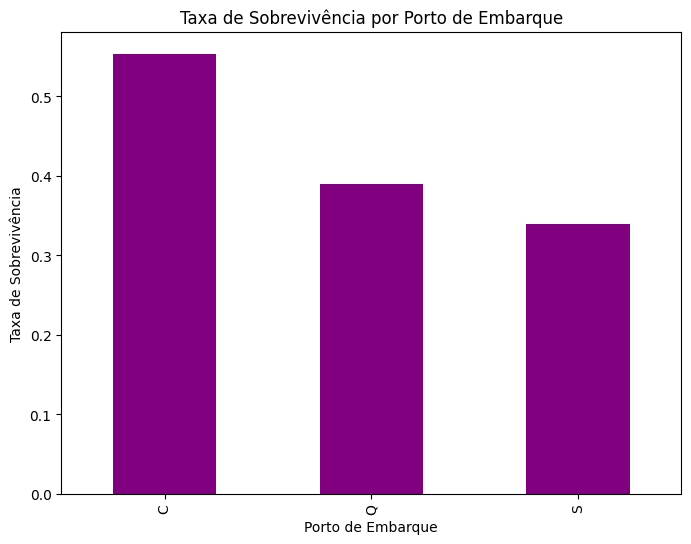

In [17]:
# Gráfico 1: Taxa de Sobrevivência por Porto de Embarque
plt.figure(figsize=(8, 6))
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', color='purple')
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Taxa de Sobrevivência')
plt.show()


Insights

1-O gráfico revela que as taxas de sobrevivência variam entre os diferentes portos de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). Isso sugere que o local de embarque pode ter tido algum impacto na sobrevivência dos passageiros.

2-Cherbourg (C) tem a maior taxa: O porto de Cherbourg (C) apresenta a taxa de sobrevivência mais alta em comparação com os outros portos. Isso indica que, em média, os passageiros que embarcaram em Cherbourg tiveram uma probabilidade maior de sobreviver.

3-Queenstown (Q) tem a menor taxa: O porto de Queenstown (Q) apresenta a taxa de sobrevivência mais baixa entre os três portos. Isso sugere que os passageiros que embarcaram em Queenstown tiveram uma taxa de sobrevivência mais baixa em comparação com os outros portos.

CONCLUSÃO

Com base no gráfico, pode-se concluir que o porto de embarque pode ter desempenhado um papel na sobrevivência dos passageiros a bordo do Titanic. No entanto, é importante notar que a taxa de sobrevivência também foi influenciada por uma série de outros fatores, como classe de bilhete, idade, sexo e disponibilidade de botes salva-vidas. Portanto, a análise da taxa de sobrevivência por porto de embarque é apenas um aspecto de uma análise mais abrangente que considera múltiplos fatores na determinação da sobrevivência dos passageiros.






In [19]:
# Calculando estatísticas das tarifas para melhor compreenção dos dados
tarifas_estatisticas = df['Fare'].describe()
print(tarifas_estatisticas)


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


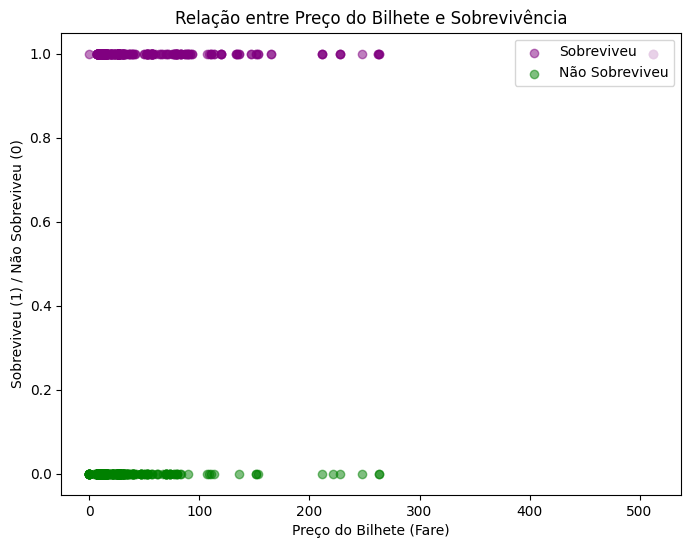

In [21]:


# Gráfico 2: Relação entre Preço do Bilhete (Fare) e Sobrevivência (Survived)
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Survived'] == 1]['Fare'],df[df['Survived'] == 1]['Survived'], color='purple', alpha=0.5, label='Sobreviveu')
plt.scatter(df[df['Survived'] == 0]['Fare'],df[df['Survived'] == 0]['Survived'], color='green', alpha=0.5, label='Não Sobreviveu')
plt.title('Relação entre Preço do Bilhete e Sobrevivência')
plt.xlabel('Preço do Bilhete (Fare)')
plt.ylabel('Sobreviveu (1) / Não Sobreviveu (0)')
plt.legend(loc='upper right')
plt.show()


Insights

1-Variação nos preços: O gráfico mostra que os preços dos bilhetes variaram amplamente, independentemente da sobrevivência. Há uma grande dispersão nos dados de tarifa, com valores mais baixos e mais altos.

2-Sobreposição de dados: Há uma sobreposição significativa entre os passageiros que sobreviveram e os que não sobreviveram em termos de preço do bilhete. Isso significa que não é possível tirar conclusões definitivas com base apenas no preço do bilhete.

3-Preços mais baixos: Observa-se que a maioria dos passageiros que não sobreviveram tinha bilhetes com preços mais baixos, mas ainda há uma sobreposição com passageiros que sobreviveram.

4-Preços mais altos: Alguns passageiros que sobreviveram também tinham bilhetes com preços mais altos, indicando que a tarifa sozinha não foi o único fator determinante para a sobrevivência.

5-Outros fatores: A sobrevivência no Titanic foi influenciada por diversos fatores, como a classe do bilhete, a idade, o sexo e a disponibilidade de botes salva-vidas. Portanto, a relação entre o preço do bilhete e a sobrevivência deve ser vista em conjunto com esses outros fatores.

CONCLUSÃO

A relação entre o preço da tarifa e a sobrevivência no Titanic é complexa e não pode ser determinada apenas com base no valor da tarifa. Embora exista uma tendência de que passageiros com tarifas mais baixas tenham uma taxa de não sobrevivência maior, a influência do preço do bilhete na sobrevivência é limitada. Outros fatores, como a classe do bilhete, a idade, o sexo e a disponibilidade de botes salva-vidas, desempenharam papéis igualmente importantes ou até mais significativos na determinação da sobrevivência dos passageiros.

Portanto, a análise da sobrevivência no Titanic deve considerar uma gama mais ampla de fatores para obter conclusões abrangentes e entender completamente por que alguns passageiros sobreviveram enquanto outros não. A tarifa é apenas um dos muitos elementos que contribuíram para o resultado final.







<Figure size 800x600 with 0 Axes>

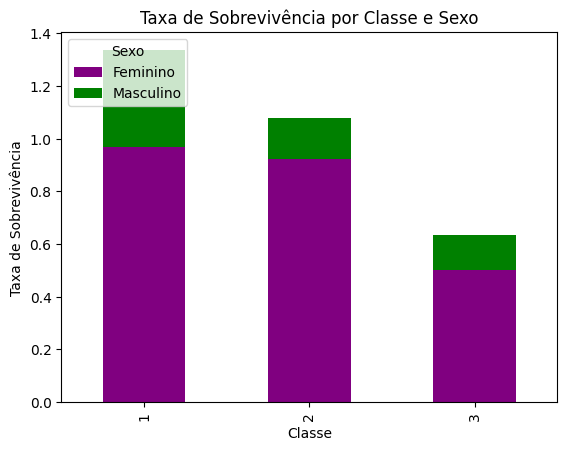

In [23]:
# Gráfico 3: Taxa de Sobrevivência por Classe e Sexo
survival_by_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

plt.figure(figsize=(8, 6))
survival_by_class_sex.plot(kind='bar', stacked=True, color=['purple', 'green'])
plt.title('Taxa de Sobrevivência por Classe e Sexo')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.legend(title='Sexo', loc='upper left', labels=['Feminino', 'Masculino'])
plt.show()


Insights:

1-Observa-se uma variação significativa na taxa de sobrevivência: O gráfico destaca que a taxa de sobrevivência variou consideravelmente entre diferentes classes e sexos. As diferenças nas taxas de sobrevivência são evidentes.

2-Taxa de sobrevivência mais alta para passageiras femininas: Em todas as classes (1ª, 2ª e 3ª classe), as passageiras do sexo feminino tiveram uma taxa de sobrevivência significativamente mais alta do que os passageiros do sexo masculino. Essa diferença é particularmente acentuada na 1ª e 2ª classes.

3-Variação nas classes: Observa-se que a 1ª classe teve as taxas de sobrevivência mais altas em geral, independentemente do sexo. A 2ª classe também teve uma taxa de sobrevivência relativamente alta. A 3ª classe teve as taxas de sobrevivência mais baixas, com uma grande diferença entre os sexos.

CONCLUSÃO

Podemos concluir que a classe social e o sexo desempenharam papéis significativos na sobrevivência no Titanic. Passageiras do sexo feminino, independentemente da classe, tiveram uma taxa de sobrevivência mais alta. A 1ª e 2ª classes tiveram taxas de sobrevivência mais altas em comparação com a 3ª classe. A análise mostra como fatores como classe e gênero influenciaram a probabilidade de sobrevivência dos passageiros no naufrágio do Titanic.